In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [2]:
# Step 2: Load the Sierra Leone raw data
file_path = '../data/sierra_leone_raw.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Column names:")
print(df.columns.tolist())


Number of rows: 525600
Number of columns: 19
Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [4]:
df.describe(include='all')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [5]:
df.isna().mean().sort_values(ascending=False) * 100


Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

In [6]:
df = df.drop(columns=['Comments'])


In [9]:
# Step 6.2: Clip negative irradiance values to zero
for col in ['GHI', 'DNI', 'DHI']:
    df[col] = df[col].clip(lower=0)


In [10]:
# Step 6.3: Remove outliers using manual Z-score
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

means = df[numeric_cols].mean()
stds  = df[numeric_cols].std()

z_scores = (df[numeric_cols] - means) / stds
mask = (z_scores.abs() < 3).all(axis=1)

df_clean = df[mask].copy()

print(f"Rows before cleaning: {df.shape[0]}")
print(f"Rows after cleaning:  {df_clean.shape[0]}")


Rows before cleaning: 525600
Rows after cleaning:  509053


In [11]:
# Step 7: Save the cleaned Sierra Leone data
output_path = '../data/sierra_leone_clean.csv'
df_clean.to_csv(output_path, index=False)
print("Cleaned data saved to", output_path)


Cleaned data saved to ../data/sierra_leone_clean.csv


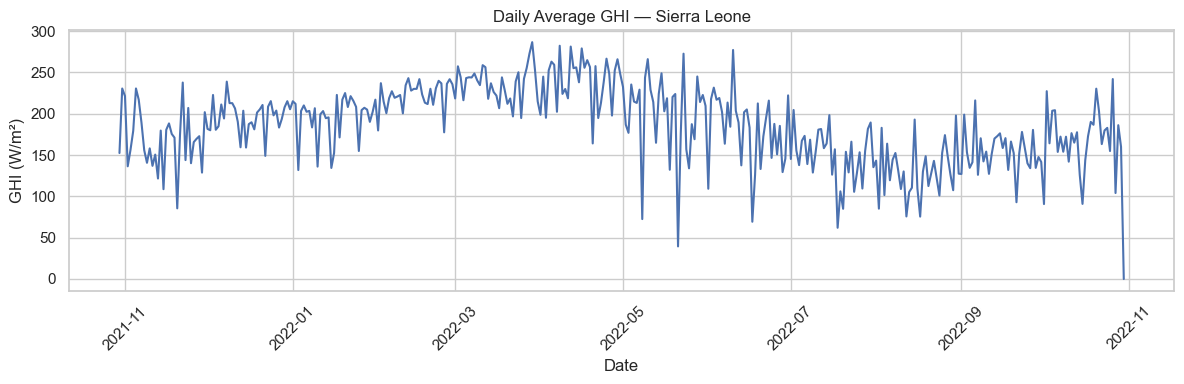

In [12]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean.set_index('Timestamp')['GHI'].resample('D').mean())
plt.title('Daily Average GHI — Sierra Leone')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.tight_layout()


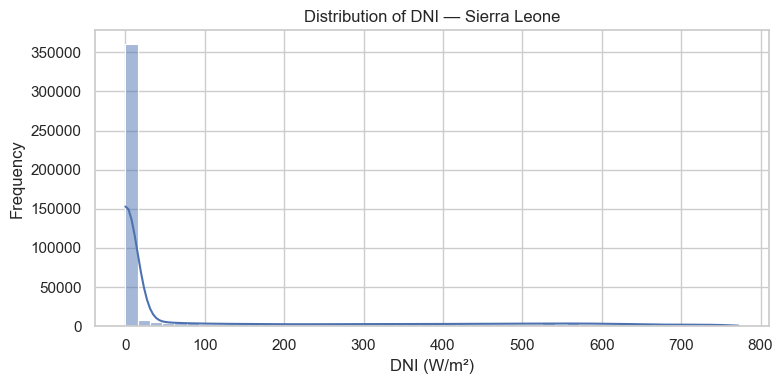

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['DNI'], bins=50, kde=True)
plt.title('Distribution of DNI — Sierra Leone')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')
plt.tight_layout()


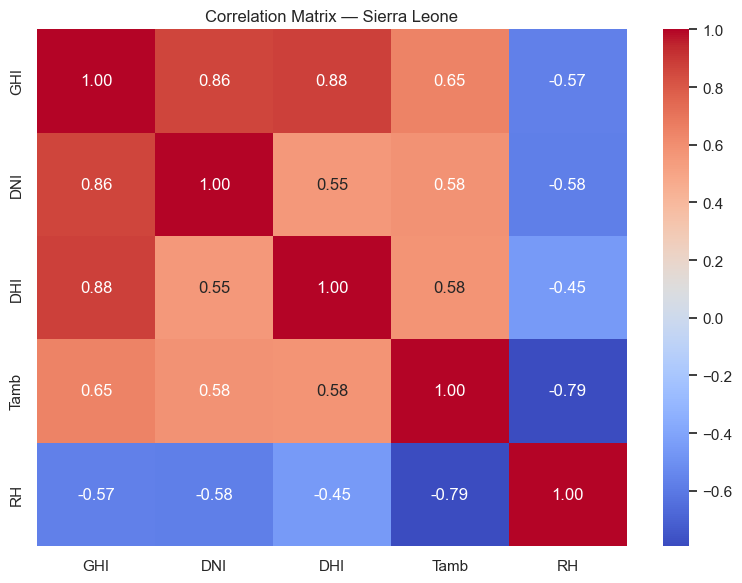

In [14]:
plt.figure(figsize=(8, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'Tamb', 'RH']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix — Sierra Leone')
plt.tight_layout()


## Key Observations — Sierra Leone Dataset

1. **Daily GHI Pattern**  
   - The daily average GHI shows a clear seasonal cycle: higher irradiance (~250–300 W/m²) from December through April and noticeably lower values (~50–150 W/m²) around June–September.  
   - Sharp day-to-day fluctuations reflect frequent weather changes, with peak irradiance occurring in the early part of the year.

2. **DNI Distribution**  
   - The DNI histogram is extremely right-skewed, with the vast majority of readings clustered near 0 W/m² (indicating nighttime or heavy cloud cover).  
   - High DNI values (above 400 W/m²) appear only rarely, forming a long tail toward the right.

3. **Correlations**  
   - **Strong positive inter-metric correlations**: GHI & DNI (~0.86), GHI & DHI (~0.88), and DNI & DHI (~0.55) indicate that all solar irradiance components rise and fall together.  
   - **Temperature relationship**: Ambient temperature (Tamb) correlates positively with GHI (≈ 0.65) and DNI (≈ 0.58), showing warmer days tend to be sunnier.  
   - **Humidity inverse relationship**: Relative humidity (RH) has a strong negative correlation with Tamb (≈ –0.79) and moderate negative correlations with GHI (≈ –0.57) and DNI (≈ –0.58), reflecting that humid/cloudy conditions suppress solar irradiance.
